Questão 01

<ipython-input-17-badd0fcc9f00>:39: RuntimeWarning: divide by zero encountered in double_scalars
  pb[5] = pb[4] * (tb[5] / tb[4]) ** (- g0 / (A[4] * R))
<ipython-input-17-badd0fcc9f00>:70: RuntimeWarning: divide by zero encountered in double_scalars
  p = pb[i] * (T / tb[i]) ** (- g0 / (A[i] * R))
<ipython-input-17-badd0fcc9f00>:82: RuntimeWarning: divide by zero encountered in double_scalars
  Hp = HB[i] + (TB[i] / A[i]) * ((p / PB[i]) ** (- A[i] * R / g0) - 1)
<ipython-input-17-badd0fcc9f00>:82: RuntimeWarning: invalid value encountered in double_scalars
  Hp = HB[i] + (TB[i] / A[i]) * ((p / PB[i]) ** (- A[i] * R / g0) - 1)


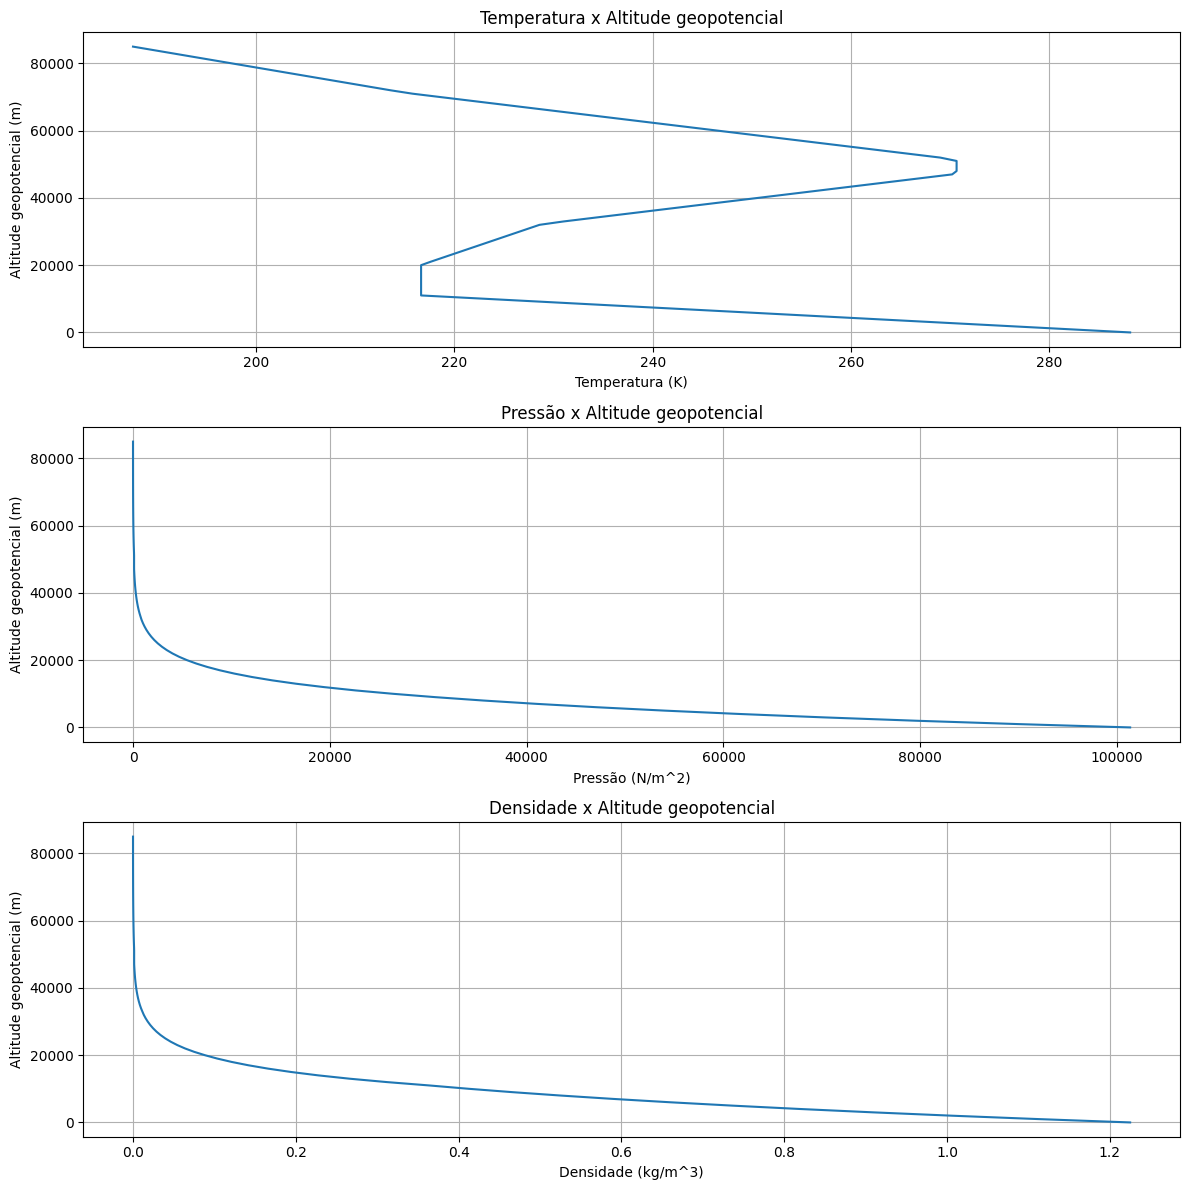

In [ ]:
import numpy as np

def ISA(H,DT):
# Funcao para calculo da atmosfera padrao ISA. Inclui variacao da
# temperatura em relacao a condicao padrao.
# Valida para altitudes entre 0 e 50.000 m. A referencia de altitude eh o
# nivel medio do mar para a latitude de 45º. A gravidade de referencia eh
# 9,80665 m/s^2.
# Entradas:
# H (m): altitude geopotencial
# DT (ºC ou ºK): Variacao de temperatura em relacao a condicao padrao
# Saidas (calculadas na altitude fornecida para a variacao de temperatura estipulada):
# T (K): Temperatura
# p (N/m^2): Pressao
# rho (kg/m^3): Densidade
# a (m/s): Velocidade do som
# mu (kg/m.s): Viscosidade dinamica
# Hp (m): Altitude pressao
    ## Constantes padrao
    g0 = 9.80665
    R = 287.053
    gama = 1.4
    mu0 = 1.7894e-05
    ## Tabelas da atmosfera padrao
    HB = np.array([0,11020,20060,32160,47350,51410,71800])
    HT = np.array([11020,20060,32160,47350,51410,71800,86000])
    A = np.array([-0.0065,0,0.001,0.0028,0,-0.0028,-0.002])
    TB = np.array([288.15,216.65,216.65,228.65,270.65,270.65,214,65])
    PB = np.array([101325,22615.9,5446.2,863.3,110.5,66.2,3.9])
    ## Correcao das tabelas de pressao e temperatura para a temperatura nao padrao
    tb=np.empty((7))
    tb = TB + DT
    pb=np.empty((7))
    pb[0] = PB[0]
    pb[1] = pb[0] * (tb[1] / tb[0]) ** (- g0 / (A[0] * R))
    pb[2] = pb[1] * np.exp(- g0 * (HB[2] - HB[1]) / (R * tb[1]))
    pb[3] = pb[2] * (tb[3] / tb[2]) ** (- g0 / (A[2] * R))
    pb[4] = pb[3] * (tb[4] / tb[3]) ** (- g0 / (A[3] * R))
    pb[5] = pb[4] * (tb[5] / tb[4]) ** (- g0 / (A[4] * R))
    pb[6] = pb[5] * (tb[6] / tb[5]) ** (- g0 / (A[5] * R))

    ## Calculos do modelo de atmosfera padrao
    if H < 0:    #caso altitude negativa
        T = tb[0]
        p = pb[0]
        rho = p / (R * T)
        a = np.sqrt(gama * R * T)
        mu = mu0
        Hp = 0
    else:
        if H > 86000:     #caso altitude maior que o teto estabelecidade, considera a ultima camada
            T = tb[6]
            p = pb[6] * np.exp(- g0 * (HT[6] - HB[6]) / (R * tb[6]))
            rho = p / (R * T)
            a = np.sqrt(gama * R * T)
            mu = mu0 * (T / tb[0]) * ((tb[0] + 110) / (T + 110))
            Hp = HB[6] - (R * tb[6] / g0) * np.log(p / pb[6])
        else:
            #verifica em que camada a altitude fornecida se encontra
            i = 0
            while H - HT[i] > 0:
                i = i + 1
            T = tb[i] + A[i] * (H - HB[i])
            #cálculo da pressão isotérmica

            if (i == 1) or (i == 6):
                p = pb[i] * np.exp(- g0 * (H - HB[i]) / (R * tb[i]))
            #gradiente de temperatura
            else:
                p = pb[i] * (T / tb[i]) ** (- g0 / (A[i] * R))
            rho = p / (R * T)
            a = np.sqrt(gama * R * T)
            mu = mu0 * (T / tb[0]) * ((tb[0] + 110) / (T + 110))
            i = 0
            while p - PB[i + 1] < 0:
                i = i + 1
                if i == 6:
                    break
            if (i == 1) or (i == 6):
                Hp = HB[i] - (R * TB[i] / g0) * np.log(p / PB[i])
            else:
                Hp = HB[i] + (TB[i] / A[i]) * ((p / PB[i]) ** (- A[i] * R / g0) - 1)

    return T,p,rho,a,mu,Hp


import numpy as np
import matplotlib.pyplot as plt

altitudes = np.arange(0,86000, 1000)

#armazenando os resultados
temperaturas = []
pressoes = []
densidades = []

#propriedades para cada altitude
for altitude in altitudes:
    T, p, rho, _, _, _ = ISA(altitude, 0)  #DT = 0 para a condição padrão
    temperaturas.append(T)
    pressoes.append(p)
    densidades.append(rho)

#gráficos
plt.figure(figsize=(12, 12))
#Pressão
plt.subplot(3, 1, 2)
plt.plot(pressoes, altitudes)
plt.title('Pressão x Altitude geopotencial')
plt.xlabel('Pressão (N/m^2)')
plt.ylabel('Altitude geopotencial (m)')
plt.grid(True)
#Densidade
plt.subplot(3, 1, 3)
plt.plot(densidades, altitudes)
plt.title('Densidade x Altitude geopotencial')
plt.xlabel('Densidade (kg/m^3)')
plt.ylabel('Altitude geopotencial (m)')
plt.grid(True)
#Temperatura
plt.subplot(3, 1, 1)
plt.plot(temperaturas, altitudes)
plt.title('Temperatura x Altitude geopotencial')
plt.xlabel('Temperatura (K)')
plt.ylabel('Altitude geopotencial (m)')
plt.grid(True)


plt.tight_layout()
plt.show()

Questão 02

-------------------------------
ENVELOPE DE VOO DO AVIÃO A JATO - Massa 1
-------------------------------
Altitude no teto de voo: h_max = 19119.972776329607 m
Velocidade no teto de voo: V = 551.9041382386724 m/s
-------------------------------
ENVELOPE DE VOO DO AVIÃO A JATO - Massa 2
-------------------------------
Altitude no teto de voo: h_max = 17708.63087391087 m
Velocidade no teto de voo: V = 527.8773179689399 m/s
-------------------------------
ENVELOPE DE VOO DO AVIÃO A JATO - Massa 3
-------------------------------
Altitude no teto de voo: h_max = 15350.145441875997 m
Velocidade no teto de voo: V = 490.03789292041876 m/s
-------------------------------
ENVELOPE DE VOO DO AVIÃO A JATO - Massa 4
-------------------------------
Altitude no teto de voo: h_max = 13423.122531682306 m
Velocidade no teto de voo: V = 461.1433127550575 m/s
-------------------------------
ENVELOPE DE VOO DO AVIÃO A JATO - Massa 5
-------------------------------
Altitude no teto de voo: h_max = 12577.122

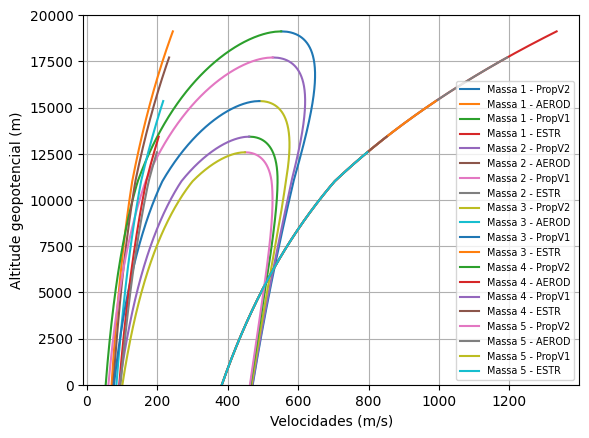

In [25]:
# Importações
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from modelo_ambiental import ISA

# Constantes gerais
g = 9.80665  # m/s**2
# Dados (no livro estão no sistema britânico, aqui foram convertidos ao SI)
CD0 = 0.015
k = 0.05
CLmax = 2.8
S = 290 * 0.092903  # m**2
rhoi = 1.225  # kg/m**3
nr = 0.6
Tmaxi=12500*4.448222
m0=73000*0.453592
qmax = 90e3  # Pa - Pressão dinâmica máxima.
# Massas para considerar
m = [0.7 * m0, 0.8 * m0, m0, 1.2 * m0, 1.3 * m0]

# Funções gerais
## Função para calcular a altitude associada a uma densidade na atmosfera padrão
def h_de_rho(rho):
# Encontrar a altitude associada à densidade - é necessário determinar o
# zero de uma função
# Monta a tupla de dados para a função objetivo
    dados = rho
    h = fsolve(resolve_rho, 0, args=dados)
    return h[0]

## Funcao objetivo do calculo da altitude em funcao da densidade

def resolve_rho(H, *dados):
    RHO = dados
    _, _, rho, _, _, _ = ISA(H, 0) # Calcula a densidade do ar
    y = rho - RHO
    return y

## Funcao para calcular o limite aerodinamico

def limite_aerodinamico(rho):
# Calcula a velocidade associada ao limite aerodinamico (velocidade de
# estol), para uma dada densidade
    V = np.sqrt(2 * m * g / (rho * S * CLmax))
    return V

## Funcao para calcular o limite estrutural
def limite_estrutural(rho):
# Calcula a velocidade associada ao limite estrutural, para uma dada
# densidade
    V = np.sqrt(2 * qmax / rho)
    return V

## Função para calcular o limite propulsivo de avião a jato
def limite_propulsivo_jato(rho):
# Retorna duas velocidades do limite propulsivo associadas a uma densidade
# rho
    Vmin = np.sqrt(-(np.sqrt(-S**2 * rho**2 * (4 * CD0 * g**2 * k * m**2 - Tmaxi**2 * (rho / rhoi)**(2 * nr))) /
                      (CD0 * S**2 * rho**2)) + (Tmaxi * (rho / rhoi)**nr) / (CD0 * S * rho))
    Vmax = np.sqrt(np.sqrt(-S**2 * rho**2 * (4 * CD0 * g**2 * k * m**2 - Tmaxi**2 * (rho / rhoi)**(2 * nr))) /
                    (CD0 * S**2 * rho**2) + (Tmaxi * (rho / rhoi)**nr) / (CD0 * S * rho))
    return Vmin, Vmax

# Loop sobre as massas
for idx, m0 in enumerate(m):
    m = m0  # Atualiza a massa para a iteração atual

    # Teto de voo
    rhomin = rhoi * ((2 * m * g * np.sqrt(k * CD0)) / Tmaxi)**(1 / nr)
    hmax = h_de_rho(rhomin)

    print(f"-------------------------------")
    print(f"ENVELOPE DE VOO DO AVIÃO A JATO - Massa {idx + 1}")
    print(f"-------------------------------")
    print(f'Altitude no teto de voo: h_max = {hmax} m')

    # Velocidade
    CLast = np.sqrt(CD0 / k)
    Vt = np.sqrt(2 * m * g / (rhomin * S * CLast))
    print(f'Velocidade no teto de voo: V = {Vt} m/s')

    N = 1000
    h = np.linspace(0, hmax - 1E-6, N)

    # Cria vetores para salvar as curvas de envelope de voo
    Va = np.zeros(N)
    Ve = np.zeros(N)
    Vp1 = np.zeros(N)
    Vp2 = np.zeros(N)

    # Calcula os pontos do envelope de voo
    for i in range(N):
        _, _, rho, _, _, _ = ISA(h[i], 0)
        Va[i] = limite_aerodinamico(rho)
        Ve[i] = limite_estrutural(rho)
        Vp1[i], Vp2[i] = limite_propulsivo_jato(rho)

    plt.plot(Vp2, h, label=f'Massa {idx + 1} - PropV2')
    plt.plot(Va, h, label=f'Massa {idx + 1} - AEROD')
    plt.plot(Vp1, h, label=f'Massa {idx + 1} - PropV1')
    plt.plot(Ve, h, label=f'Massa {idx + 1} - ESTR')



#configurações do gráfico
plt.grid()
plt.xlabel('Velocidades (m/s)')
plt.ylabel('Altitude geopotencial (m)')
plt.legend(fontsize='x-small')
plt.ylim(0, 20000)  # Limita o eixo y até a altitude máxima
plt.show()

Questão 03

In [ ]:
 # -*- coding: utf-8 -*-
"""Untitled3.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1UXIAVis87DbySyaoX__lLOu0dbIfLmH6
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Constantes gerais
g = 9.80665  # m/s**2

# Função para calcular a altitude associada a uma densidade na atmosfera padrão
def h_de_rho(rho):
    dados = rho
    h = fsolve(resolve_rho, 0, args=dados)
    return h[0]

# Funcao objetivo do calculo da altitude em funcao da densidade
def resolve_rho(H, *dados):
    RHO = dados
    _, _, rho, _, _, _ = ISA(H, 0)  # Calcula a densidade do ar
    y = rho - RHO
    return y

# Funcao para calcular o limite aerodinamico
def limite_aerodinamico(rho):
    V = np.sqrt(2 * m * g / (rho * S * CLmax))
    return V

# Funcao para calcular o limite estrutural
def limite_estrutural(rho):
    V = np.sqrt(2 * qmax / rho)
    return V

# Função para calcular o teto de voo do avião a hélice com base em uma temperatura
def teto_helice(DT):
    def resolve_teto(rho):
        if rho < 0:
            rho = -rho
        y = (eta * Pi * rhoi ** (-mr)) * rho ** mr - ((4 / 3) * np.sqrt(((2 * (m * g) ** 3) / S) * np.sqrt(3 * k ** 3 * CD0))) * rho ** (-0.5)
        return y

    rhomin = fsolve(resolve_teto, 1)
    return rhomin[0]

# Funcao para calcular o envelope de voo para 5 temperaturas ISA diferentes
def calcular_envelope_de_voo_para_temperaturas_ISA(DTs):
    envelopes = []  # Lista para armazenar os resultados para cada temperatura ISA
    for DT in DTs:
        rhomin = teto_helice(DT)
        hmax = h_de_rho(rhomin)

        N = 1000
        h = np.linspace(0, hmax - 1E-6, N)

        Va = np.zeros(N)
        Ve = np.zeros(N)
        Vp1 = np.zeros(N)
        Vp2 = np.zeros(N)

        for i in range(N):
            _, _, rho, _, _, _ = ISA(h[i], DT)
            Va[i] = limite_aerodinamico(rho)
            Ve[i] = limite_estrutural(rho)
            Vp1[i], Vp2[i] = limite_propulsivo_helice(rho)

        envelope = {
            'DT': DT,
            'h': h,
            'Va': Va,
            'Ve': Ve,
            'Vp1': Vp1,
            'Vp2': Vp2,
        }
        envelopes.append(envelope)

    return envelopes

# Constantes e parâmetros do exemplo
CD0 = 0.026
k = 0.054
CLmax = 2.4
S = 175 * 0.092903
m = 2900 * 0.453592
eta = 0.8
Pi = 290 * 745.6999
rhoi = 1.225
mr = 0.6
qmax = 3e3

# Exemplo de 5 temperaturas ISA diferentes (variações de temperatura em relação à ISA padrão)
DTs = [0, 5, -5, 10, -10]

# Calcula o envelope de voo para as 5 temperaturas ISA diferentes
envelopes = calcular_envelope_de_voo_para_temperaturas_ISA(DTs)


# Plota os envelopes de voo para cada temperatura ISA
plt.figure(figsize=(15, 10))
for envelope in envelopes:
    label = f'Aerodinâmico // Δ{envelope["DT"]}°C'
    plt.plot(envelope['Va'], envelope['h'], label=label)
    plt.plot(envelope['Ve'], envelope['h'], linestyle='--', label=f'Estrutural // Δ{envelope["DT"]}°C')
    plt.plot(envelope['Vp1'], envelope['h'], linestyle=':', label=f'Propulsivo 1 // Δ{envelope["DT"]}°C')
    plt.plot(envelope['Vp2'], envelope['h'], linestyle='-.', label=f'Propulsivo 2 // Δ{envelope["DT"]}°C')

plt.grid()
plt.xlabel('Velocidade (m/s)')
plt.ylabel('Altitude (m)')

# Posiciona a legenda acima do gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=5)  # ncol define o número de colunas na legenda
plt.title('Envelopes de Voo para Temperaturas ISA Diferentes')
plt.show()

<ipython-input-17-badd0fcc9f00>:39: RuntimeWarning: divide by zero encountered in double_scalars
  pb[5] = pb[4] * (tb[5] / tb[4]) ** (- g0 / (A[4] * R))


NameError: ignored